In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

## Drawer kinematics

In [119]:
df_drawer_3 = pd.read_csv('results/drawer_testmu012_mu1_sigma0_iter3.csv', index_col='Unnamed: 0')
df_drawer_4 = pd.read_csv('results/drawer_testmu012_mu1_sigma0_iter4.csv', index_col='Unnamed: 0')
df_drawer_5 = pd.read_csv('results/drawer_testmu012_mu1_sigma0_iter5.csv', index_col='Unnamed: 0')
df_drawer = df_drawer_3.append(df_drawer_4, ignore_index=True).append(df_drawer_5, ignore_index=True)

In [113]:
df_drawer.describe()

,timestep,drawer_pos,n_drawer_open,drawer_force
count,30000.000000,30000.000000,30000.000000,30000.0
mean,500.500000,0.159431,4841.406000,12.0
std,288.679802,0.015067,2803.862125,0.0
min,1.000000,0.138603,0.000000,12.0
25%,250.750000,0.152383,2413.750000,12.0
50%,500.500000,0.156138,4855.000000,12.0
75%,750.250000,0.163510,7268.250000,12.0
max,1000.000000,0.250122,9710.000000,12.0


In [115]:
df_drawer['velocity'] = df_drawer['drawer_pos'].diff()
df_drawer['acceleration'] = df_drawer['velocity'].diff()

In [116]:
df_drawer_kin = df_drawer[['timestep','drawer_pos','velocity','acceleration']].groupby('timestep').agg(['mean','std'])
df_drawer_kin = df_drawer_kin.iloc[2:]
df_drawer_kin_zoom = df_drawer_kin[0:200]

df_drawer_kin_zoom

drawer_pos            velocity            acceleration              
               mean       std      mean       std          mean           std
timestep                                                                     
3.0        0.249904  0.000056 -0.000094  0.000009 -7.037588e-05  4.400423e-06
4.0        0.249719  0.000055 -0.000185  0.000007 -9.128939e-05  6.089195e-06
5.0        0.249426  0.000052 -0.000293  0.000010 -1.077430e-04  7.299071e-06
6.0        0.249017  0.000052 -0.000409  0.000015 -1.163653e-04  7.078722e-06
7.0        0.248485  0.000057 -0.000532  0.000020 -1.226225e-04  6.197874e-06
...             ...       ...       ...       ...           ...           ...
196.0      0.153652  0.006044  0.000014  0.000002 -2.923683e-08  6.136360e-07
197.0      0.153666  0.006043  0.000014  0.000002 -1.126656e-07  6.718752e-07
198.0      0.153680  0.006041  0.000014  0.000002  3.927477e-08  5.484269e-07
199.0      0.153694  0.006040  0.000014  0.000002  4.585421e-08  6.883879e-07
200.0      0.153707  0.006039  0.000014  0.000002  3.233064e-08  4.720287e-07

[198 rows x 6 columns]

Text(0, 0.5, 'Drawer position (m)')

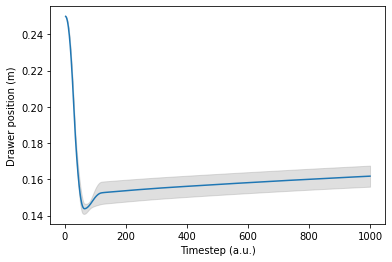

In [117]:
plt.fill_between(df_drawer_kin.index,
                 df_drawer_kin['drawer_pos']['mean']-df_drawer_kin['drawer_pos']['std'],
                 df_drawer_kin['drawer_pos']['mean']+df_drawer_kin['drawer_pos']['std'],
                 color='gray', alpha=0.25)

plt.plot(df_drawer_kin.index, df_drawer_kin['drawer_pos']['mean'],)

plt.xlabel('Timestep (a.u.)')
plt.ylabel('Drawer position (m)')

Text(0, 0.5, 'Acceleration (a.u.)')

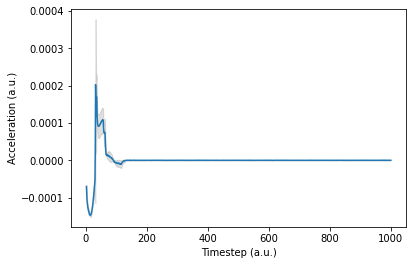

In [118]:
plt.fill_between(df_drawer_kin.index,
                 df_drawer_kin['acceleration']['mean']-df_drawer_kin['acceleration']['std'],
                 df_drawer_kin['acceleration']['mean']+df_drawer_kin['acceleration']['std'],
                 color='gray', alpha=0.25)

plt.plot(df_drawer_kin.index, df_drawer_kin['acceleration']['mean'],)

plt.xlabel('Timestep (a.u.)')
plt.ylabel('Acceleration (a.u.)')

Text(0, 0.5, 'Acceleration (a.u.)')

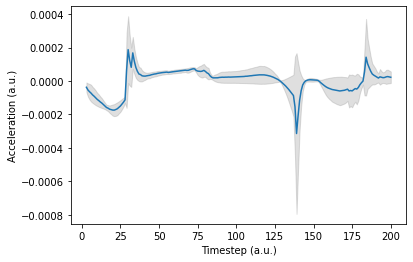

In [96]:
plt.fill_between(df_drawer_kin_zoom.index,
                 df_drawer_kin_zoom['acceleration']['mean']-df_drawer_kin_zoom['acceleration']['std'],
                 df_drawer_kin_zoom['acceleration']['mean']+df_drawer_kin_zoom['acceleration']['std'],
                 color='gray', alpha=0.25)

plt.plot(df_drawer_kin_zoom.index, df_drawer_kin_zoom['acceleration']['mean'],)

plt.xlabel('Timestep (a.u.)')
plt.ylabel('Acceleration (a.u.)')

## MIMo torques

In [141]:
df_torques_3 = pd.read_csv('results/torques_testmu00_mu1_sigma0_iter3.csv', index_col='Unnamed: 0')
df_torques_4 = pd.read_csv('results/torques_testmu00_mu1_sigma0_iter4.csv', index_col='Unnamed: 0')
df_torques_5 = pd.read_csv('results/torques_testmu00_mu1_sigma0_iter5.csv', index_col='Unnamed: 0')
df_torques_mu1_tmu0 = df_torques_3.append(df_torques_4, ignore_index=True).append(df_torques_5, ignore_index=True)

In [142]:
df_torques_3 = pd.read_csv('results/torques_testmu012_mu1_sigma0_iter3.csv', index_col='Unnamed: 0')
df_torques_4 = pd.read_csv('results/torques_testmu012_mu1_sigma0_iter4.csv', index_col='Unnamed: 0')
df_torques_5 = pd.read_csv('results/torques_testmu012_mu1_sigma0_iter5.csv', index_col='Unnamed: 0')
df_torques_mu1_tmu12 = df_torques_3.append(df_torques_4, ignore_index=True).append(df_torques_5, ignore_index=True)

In [143]:
df_torques_mu1_tmu0 = df_torques_mu1_tmu0.groupby('0').mean()
df_torques_mu1_tmu12 = df_torques_mu1_tmu12.groupby('0').mean()
df_torques_mu1_tmu12.tail(2)

,1,2,3,4,5,6,7,8,9,10,...,38,39,40,41,42,43,44,45,46,47
0,,,,,,,,,,,,,,,,,,,,,
999.0,-0.003680,0.075230,-0.084585,-0.018206,0.067743,-0.095108,-0.144089,0.045267,0.001387,0.000003,...,-0.00006,-0.000994,-0.134457,0.000484,-0.000333,-0.001748,0.00172,0.000043,-0.000057,-0.000998
1000.0,-0.003678,0.075255,-0.084593,-0.018221,0.067766,-0.095115,-0.144137,0.045271,0.001391,0.000003,...,-0.00006,-0.000994,-0.134469,0.000485,-0.000333,-0.001748,0.00172,0.000043,-0.000057,-0.000998


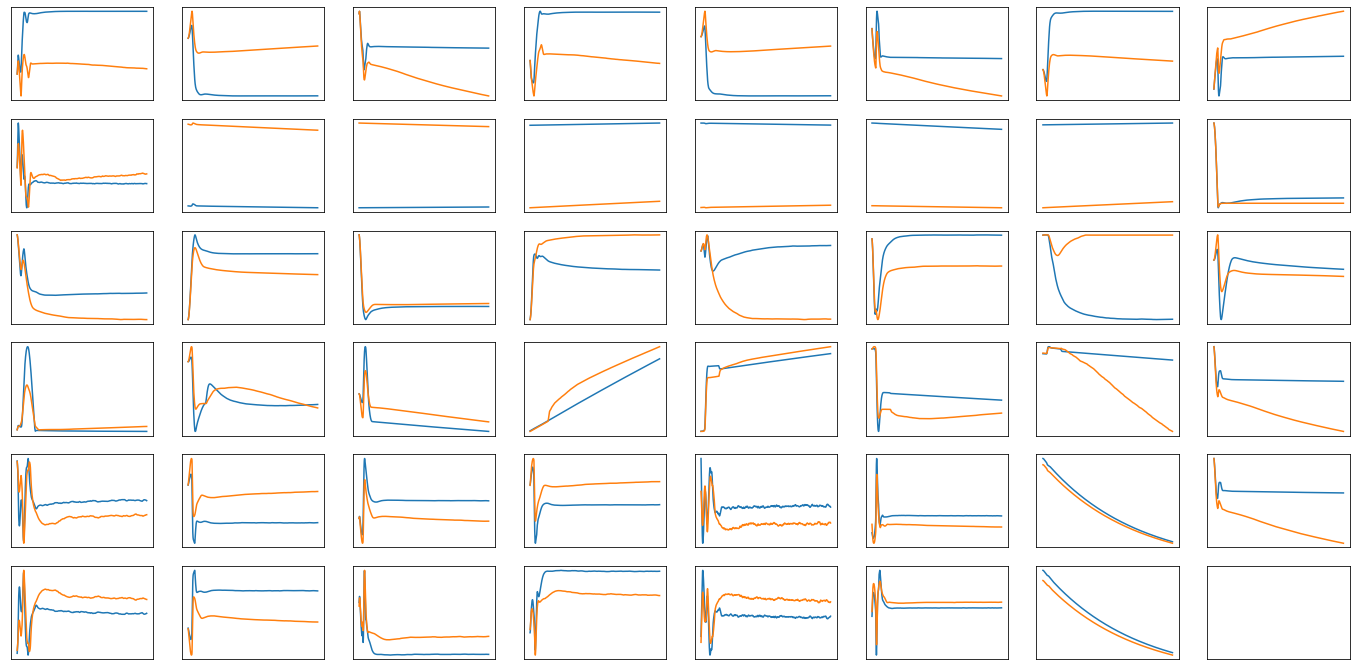

In [144]:
fig,ax = plt.subplots(6,8, figsize=(24,12))
col = 0
for idx in range(6):
    for idy in range(8):
        col+=1
        ax[idx,idy].axes.xaxis.set_visible(False)
        ax[idx,idy].axes.yaxis.set_visible(False)
        if col<=47:
            ax[idx,idy].plot(df_torques_mu1_tmu0[str(col)])
            ax[idx,idy].plot(df_torques_mu1_tmu12[str(col)])

In [145]:
df_torques_3 = pd.read_csv('results/torques_testmu00_mu12_sigma0_iter3.csv', index_col='Unnamed: 0')
df_torques_4 = pd.read_csv('results/torques_testmu00_mu12_sigma0_iter4.csv', index_col='Unnamed: 0')
df_torques_5 = pd.read_csv('results/torques_testmu00_mu12_sigma0_iter5.csv', index_col='Unnamed: 0')
df_torques_mu12_tmu0 = df_torques_3.append(df_torques_4, ignore_index=True).append(df_torques_5, ignore_index=True)

In [146]:
df_torques_3 = pd.read_csv('results/torques_testmu012_mu12_sigma0_iter3.csv', index_col='Unnamed: 0')
df_torques_4 = pd.read_csv('results/torques_testmu012_mu12_sigma0_iter4.csv', index_col='Unnamed: 0')
df_torques_5 = pd.read_csv('results/torques_testmu012_mu12_sigma0_iter5.csv', index_col='Unnamed: 0')
df_torques_mu12_tmu12 = df_torques_3.append(df_torques_4, ignore_index=True).append(df_torques_5, ignore_index=True)

In [147]:
df_torques_mu12_tmu0 = df_torques_mu12_tmu0.groupby('0').mean()
df_torques_mu12_tmu12 = df_torques_mu12_tmu12.groupby('0').mean()
df_torques_mu12_tmu12.tail(2)

,1,2,3,4,5,6,7,8,9,10,...,38,39,40,41,42,43,44,45,46,47
0,,,,,,,,,,,,,,,,,,,,,
999.0,0.007513,-0.013014,-0.076582,-0.006732,-0.023162,-0.087134,0.036883,0.041337,0.003116,-0.000003,...,-0.000055,-0.000996,-0.122065,0.001083,0.000174,-0.00188,0.001873,0.000071,-0.000061,-0.000994
1000.0,0.007507,-0.012962,-0.076596,-0.006743,-0.023110,-0.087149,0.036779,0.041344,0.003118,-0.000003,...,-0.000055,-0.000996,-0.122086,0.001083,0.000174,-0.00188,0.001873,0.000071,-0.000061,-0.000994


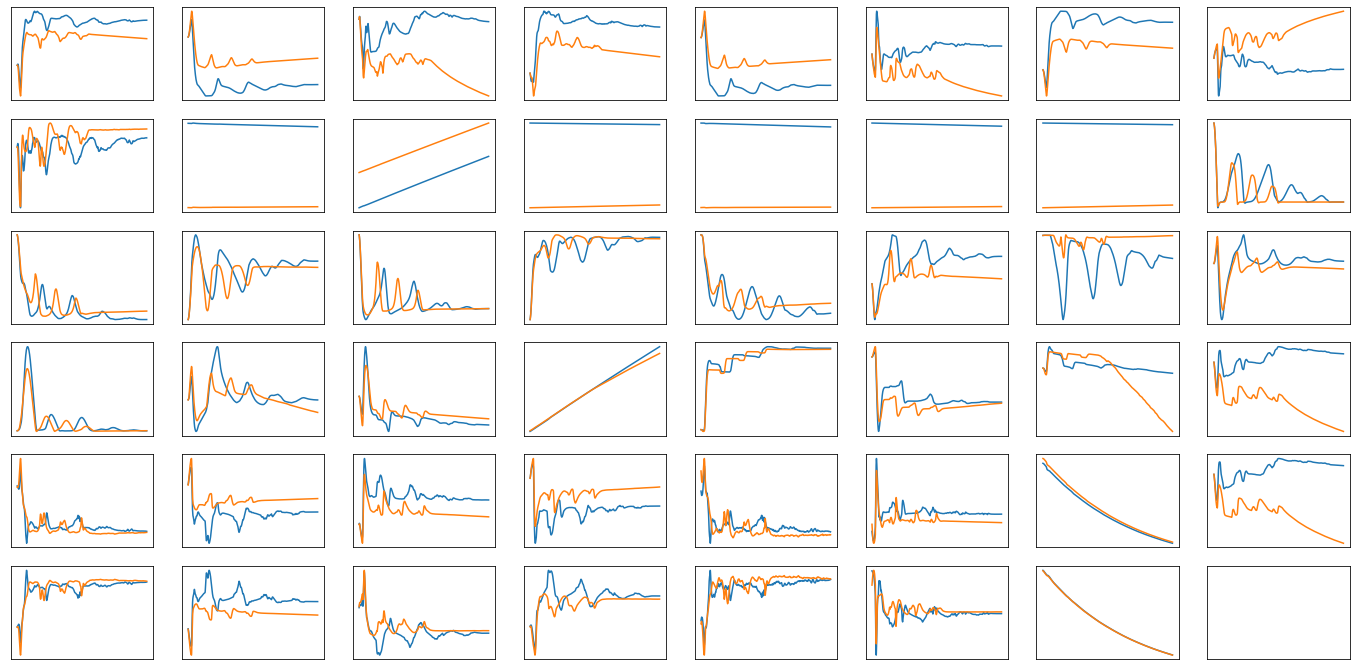

In [148]:
fig,ax = plt.subplots(6,8, figsize=(24,12))
col = 0
for idx in range(6):
    for idy in range(8):
        col+=1
        ax[idx,idy].axes.xaxis.set_visible(False)
        ax[idx,idy].axes.yaxis.set_visible(False)
        if col<=47:
            ax[idx,idy].plot(df_torques_mu12_tmu0[str(col)])
            ax[idx,idy].plot(df_torques_mu12_tmu12[str(col)])

## PACMAPs